# Példa 6.4
Egy $20 \,\rm{mm}$ átmérőjű acél tengelyt az A és D csapágyak támasztják meg, melyek engedik a tengely kismértékű szögelfordulását. Az A csapágy gátolja a tengelyirányú elmozdulást, míg a D csapágy engedélyezi. A tengely terhelése a B és C szíjtárcsákról átadódó erők és nyomatékok. Határozzuk meg a tengelyben ébredő maximális Mohr és HMH-féle egyenértékű feszültségeket! Mekkora legyen a tengely átmérője ha $\sigma_{\mathrm{meg}}=300\,\rm{MPa}$?

<img src="Fig_6.4.png" style="width: 600px;">

# Megoldás

Szükségünk lesz a `sympy` modulra.

In [1]:
import sympy as sp
sp.init_printing()

F_A, F_D, x = sp.symbols("F_A, F_D, x")

Határozzuk meg a terheléseket!

<img src="Fig_6.4b.png" style="width: 600px;">

Az $F_{\rm{A}}$ és $F_{\rm{D}}$ erők meghatározásának menete:
- Felírjuk a nyomatéki egyenletet az A pontra.
- Kiszámítjuk $F_{\rm{D}}$-t.
- A $z$ irányú erőegyensúly alapján kiszámítjuk $F_{\rm{A}}$-t.

Természetesen ezek az egyenletek kézzel is könnyedén megoldhatóak lennének.

In [2]:
MA = -150*2400-450*1300+600*F_D #nyomatéki egyenlet az A pontra
F_D_megoldas = sp.solve(MA,F_D) 
display(F_D_megoldas) #egy 1 elemű listát kapunk

F_D_megoldas = F_D_megoldas[0] #az egyszerűség kedvéért kiszedjük a megoldást a listából
F_D_megoldas #N

In [3]:
Fz = 2400+1300-F_D_megoldas-F_A #z irányú erőegyensúly
F_A_megoldas = sp.solve(Fz,F_A) 
F_A_megoldas = F_A_megoldas[0] #kiszedjük a megoldást a listából
F_A_megoldas #N

Az igénybevételi függvények szakaszonként adhatóak meg. Ehhez a `Piecewise()` függvényt használhatjuk. Fontos, hogy a megfelelő sorrendben adjuk meg a szakaszokat, növekvő $x$ szerint. A nyíró igénybevétel ($V(x)$):

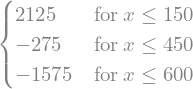

In [4]:
Vx = sp.Piecewise((F_A_megoldas,x<=150),(F_A_megoldas-2400,x<=450),(F_A_megoldas-2400-1300,x<=600))
Vx

Hasonlóan írhatjuk fel a hajlító igénybevételi függvényt ($M_{\rm h}(x)$) is:

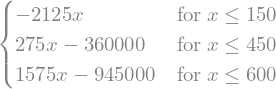

In [5]:
Mhx = sp.Piecewise((-F_A_megoldas*x,x<=150),(-F_A_megoldas*x+2400*(x-150),x<=450),(-F_A_megoldas*x+2400*(x-150)+1300*(x-450),x<=600))
Mhx

Hasonlóan írhatjuk fel a csavaró igénybevételi függvényt ($M_{\rm t}(x)$) is:

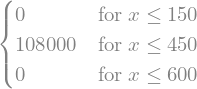

In [6]:
Mtx = sp.Piecewise((0,x<=150),(108000,x<=450),(0,x<=600))
Mtx

Ezeket at 1.10-es feladathoz hasonló módon ábrázoljuk.

In [7]:
import matplotlib.pyplot as plt # Betöltjük a matplotlib modult, amivel plotolhatunk.
from numpy import linspace # Betöltjük csak linspace függvényt a numpy modulból (tehát nem a modul 
                           # összes függvényét), amivel majd a plotoláshoz készítjük az x értékek sorozatát
    
L = 600 # A rúd teljes hossza.
xs = linspace(0,L,601)  # Felveszünk 601 darab x értéket a rúd hossza mentén 
                                # (az L hosszat át kell alakítani float-tá).
Vxs = [Vx.subs(x,xi) for xi in xs] # Kiszámoljuk a nyíróerő függvény értékeit a megadott x helyeken. 
# Vx.subs(x,xi): a Vx függvényben lévő x változó helyére behelyettesítjük xi-t.
Mhxs = [Mhx.subs(x,xi) for xi in xs] # Kiszámoljuk a hajlítónyomatéki függvény értékeit a megadott x helyeken.
Mtxs = [Mtx.subs(x,xi) for xi in xs] # Kiszámoljuk a csavarónyomatéki függvény értékeit a megadott x helyeken.

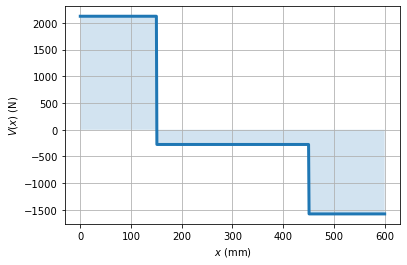

In [8]:
plt.plot(xs, Vxs, lw = 3) # A V(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw).
Vx_PythonFloat=[float(Vx) for Vx in Vxs] #A fill_between nem tudja kezelni a sympy változóit, ezért konvertáljuk
plt.fill_between(xs, Vx_PythonFloat, alpha=0.2) #Kiszínezi a függvény alatti területet
plt.xlabel("$x$ (mm)") #x tengelyhez tartozó tengelyfelirat
plt.ylabel("$V(x)$ (N)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács
plt.show() #kirajzolás

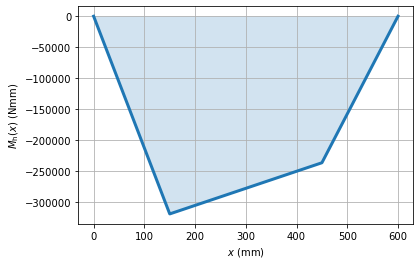

In [9]:
plt.plot(xs, Mhxs, lw = 3) #az Mh(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw)
Mhx_PythonFloat=[float(Mhx) for Mhx in Mhxs] #A fill_between nem tudja kezelni a sympy változóit, ezért konvertáljuk
plt.fill_between(xs, Mhx_PythonFloat, alpha=0.2) #Kiszínezi a függvény alatti területet
plt.ylabel(r"$M_{\rm h}(x)$ (Nmm)") # x tengelyhez tartozó tengelyfelirat. Az r kell az "" elé, ha '\' (backslash) 
                                    # karaktert szeretnénk a stringbe tenni a LaTeX parancsok miatt.
plt.xlabel("$x$ (mm)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács létrehozása
plt.show() #kirajzolás

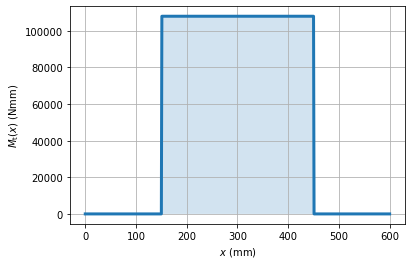

In [10]:
plt.plot(xs, Mtxs, lw = 3) #az Mt(x) függvény képének létrehozása 3-as vonalvastagsággal (linewidth = lw)
Mtx_PythonFloat=[float(Mtx) for Mtx in Mtxs] #A fill_between nem tudja kezelni a sympy változóit, ezért konvertáljuk
plt.fill_between(xs, Mtx_PythonFloat, alpha=0.2) #Kiszínezi a függvény alatti területet 0-ig
plt.ylabel(r"$M_{\rm t}(x)$ (Nmm)") # x tengelyhez tartozó tengelyfelirat. Az r kell az "" elé, ha '\' (backslash) 
                                    # karaktert szeretnénk a stringbe tenni a LaTeX parancsok miatt.
plt.xlabel("$x$ (mm)") #y tengelyhez tartozó tengelyfelirat
plt.grid() #rács létrehozása
plt.show() #kirajzolás

Láthatjuk, hogy mindegyik igénybevétel abszolut értéke a B keresztmetszetben a legnagyobb, ezért ez lesz a veszélyes keresztmetszet. 
$$M_{\rm h}(B)=-318750 \, \rm{Nmm},$$
$$M_{\rm t}(B)=108000 \, \rm{Nmm}.$$

In [11]:
Mhb = Mhx.subs(x,150) 
display(Mhb) #Nmm

Mtb = Mtx.subs(x,150)
display(Mtb) #Nmm

A B pontban szakadása van az $M_{\rm t}$ függvénynek. A függvény definiálási módja miatt itt 0-t kapunk. Egy lehetséges mód a helyes érték kinyerésére, ha a plothoz létrehozott adatsorból kiválasztjuk a legnagyobb értéket. Ez a megoldás ebben a konkrét esetben működik, viszont általánosságban nem.

Megbízhatóbb módszer, ha felveszünk egy kis $\delta$ távolságot, és B helye előtt és után $\delta$-nal vizsgáljuk a függvény értékét, és választjuk ki azt, hogy az abszolut érték nagyobb. Ezzel a módszerrel csak nagyon kis hibát követünk el, akkor is, ha a vizsgált függvény nem konstans szakaszokból áll.

In [12]:
δ = 1e-10 #\delta = 10^-10 mm
MtB_elott = Mtx.subs(x,150-δ)
MtB_utan = Mtx.subs(x,150+δ)
nagyobb_abs = max(abs(MtB_elott),abs(MtB_utan))
Mtb = nagyobb_abs
Mtb

A Mohr és HMH elmélet szerinti redukált nyomatékok:

In [13]:
MredMohr = sp.sqrt(Mhb**2+Mtb**2)
print('Mohr alapján:')
display(MredMohr.evalf(5)) #Nmm

MredHMH = sp.sqrt(Mhb**2+3*Mtb**2/4)
print('HMH alapján:')
MredHMH.evalf(5) #Nmm

Mohr alapján:


HMH alapján:


A keresztmetszeti tényező $d=20 \, \rm{mm}$ esetén:

In [14]:
d = 20
Ky = d**3*sp.pi/32

#### A Mohr és HMH elmélet szerinti egyenértékű feszültségek:

In [15]:
σegyMohr = MredMohr/Ky
print('Mohr alapján:')
display(σegyMohr.evalf(5)) #MPa

σegyHMH = MredHMH/Ky
print('HMH alapján:')
σegyHMH.evalf(5) #MPa

Mohr alapján:


HMH alapján:


#### Méretezés:

Az előbbi összefüggésekből az átmérőt kifejezve a következő kifejezésre jutunk:
$$d_{min}=\sqrt[3]{\frac{32 M_{red}}{\pi \sigma_{meg}}}.$$

In [16]:
σmeg = 300 #MPa
dminMohr = sp.root(32*MredMohr/(sp.pi*σmeg),3)
print('Mohr alapján:')
display(dminMohr.evalf(5)) #mm

dminHMH = sp.root(32*MredHMH/(sp.pi*σmeg),3)
print('HMH alapján:')
dminHMH.evalf(5) #mm

Mohr alapján:


HMH alapján:
